In [2]:
%matplotlib inline

In [3]:
import os
import nltk
import matplotlib
import collections
import pandas as pd
import matplotlib.pyplot as plt

from nltk.book import *
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (14,6)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
"""
PROBLEM STATEMENT:

With the current political climate plauging the US, there are many individuals (politicians and non-politicians) 
who frequently use the words 'democracy' and 'patriot'. Usually, these words are used in an agenda-driven manner 
and, more often than not, the words are used errantly simply to drive that particular individual's agenda. 
This led me to wonder how often those and other politically-related words have appeared in the Inaugural Address Corpus 
available in the NLTK.


#######################################################################################################################

Get NLTK Data
"""

nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\joaquin/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nlt

True

In [5]:
"""
Explore text; examine collocations.
"""

text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [6]:
"""
Concordances & Dispersion Plots

Examine an individual word in the text; get context wtih NLTK.
"""

text4.concordance('democracy')

Displaying 25 of 58 matches:
ther a confederated representative democracy were a government competent to the
sions of government but to that of democracy . If such is its theory , those wh
r ideas of a simple representative democracy or republic , and knowing the tend
 of their country . In the name of democracy they speak , warning the people ag
unusual professions of devotion to democracy . The foregoing remarks relate alm
 unshaken temple of representative democracy , to be not only an inspiration an
 reflects the glory of new - world democracy , but in the new order of finance 
he righteousness of representative democracy , where our freedom never has made
 with the ideals of representative democracy , when one portion of our citizens
TY RESPONSIBILITIES In our form of democracy the expression of the popular will
t distrust the future of essential democracy . The people of the United States 
mes require , without yielding its democracy . Our tasks in the last four years
 the last f

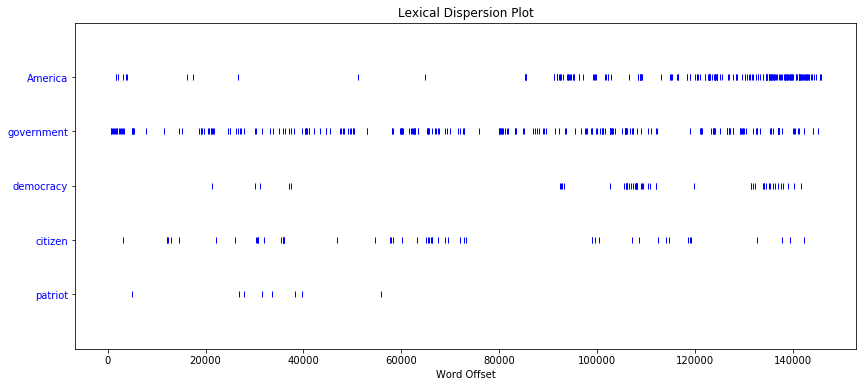

In [7]:
"""
Use the dispersion_plot() function to visulalize where words occur in text.
"""

text4.dispersion_plot(['America', 'government', 'democracy', 'citizen', 'patriot'])

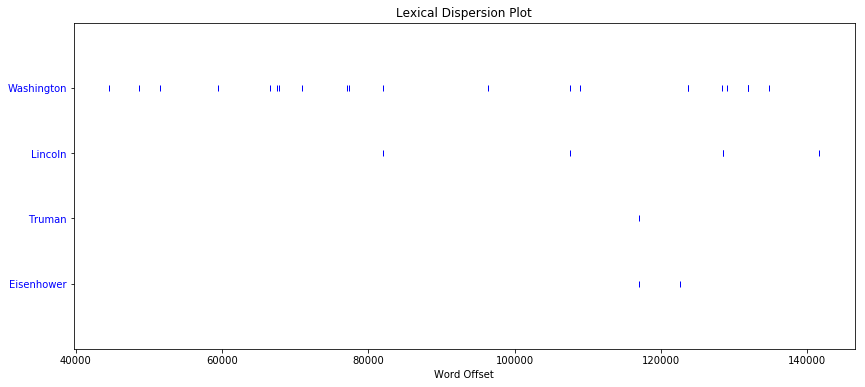

In [8]:
"""
FINDINGS:

    1. More than any other word in our list, 'government' occurs most frequently.
    2. 'democracy' shows an interesting trend.

######################################################################################################

Examine the dispersion plots of presidents' names to see relationship or 
mention frequency: Washington, Lincoln, Trum, Eisenhower.
"""

text4.dispersion_plot(['Washington', 'Lincoln', 'Truman', 'Eisenhower'])

In [9]:
"""
FINDINGS:

    1. With the exception of Washington, the other presidents are hardly mentioned by name, if at all.

######################################################################################################

Measuring Text Vocabulary

Use the len() function to count the total number of words in the Corpus.
"""

len(text4)

145735

In [10]:
"""
Compare to the vocublary in all the other texts in the corpora.
"""

alltexts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

"""
Use a lookup function.
"""

lengths = {text.name: len(text) for text in alltexts}

"""
Improve readability; import table into Pandas.
"""

pd.Series(lengths)

Chat Corpus                                             45010
Inaugural Address Corpus                               145735
Moby Dick by Herman Melville 1851                      260819
Monty Python and the Holy Grail                         16967
Personals Corpus                                         4867
Sense and Sensibility by Jane Austen 1811              141576
The Book of Genesis                                     44764
The Man Who Was Thursday by G . K . Chesterton 1908     69213
Wall Street Journal                                    100676
dtype: int64

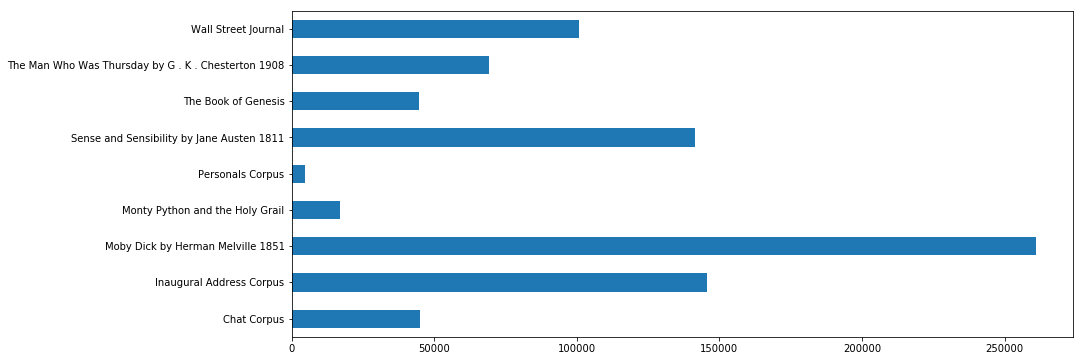

In [11]:
"""
Plot data to compare visually.
"""

pd.Series(lengths).plot(kind='barh')

In [12]:
"""
FINDINGS:

    1. The Inaugural Address Corpus is the second longest in word count; second only to the tome, Moby Dick.

############################################################################################################


Find Vocabulary
"""

len(set(text4))

9754

In [13]:
"""
Adjust for Total Words
"""

len(text4) / len(set(text4))

14.941049825712529

In [14]:
"""
Write a function and apply to all texts.
"""

def vocab(text):                       # Define a function called `vocab` that takes the input `text` 
    return len(text) / len(set(text))  # Division: number of words / number of unique words

vocab(text4)

"""
Get the vocabulary for each text and put it in a table.
"""

vocabs = {text.name: vocab(text) for text in alltexts}

"""
Pandas for better visualization.
"""

pd.Series(vocabs)

Chat Corpus                                             7.420046
Inaugural Address Corpus                               14.941050
Moby Dick by Herman Melville 1851                      13.502045
Monty Python and the Holy Grail                         7.833333
Personals Corpus                                        4.392599
Sense and Sensibility by Jane Austen 1811              20.719450
The Book of Genesis                                    16.050197
The Man Who Was Thursday by G . K . Chesterton 1908    10.167915
Wall Street Journal                                     8.113798
dtype: float64

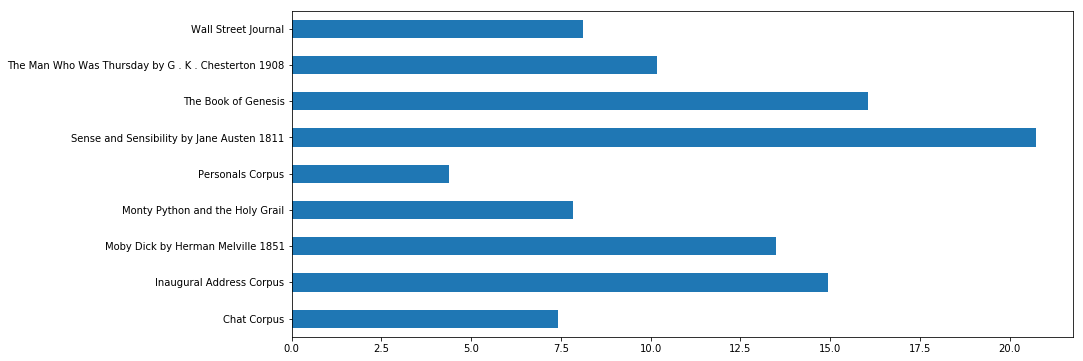

In [16]:
"""
Plot Data
"""

pd.Series(vocabs).plot(kind='barh')

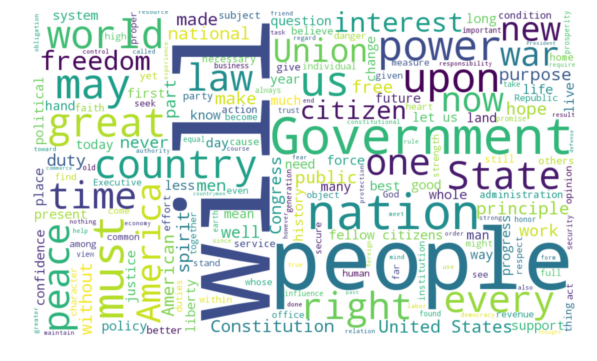

In [17]:
"""
Plot the most statistically significant words as a WordCloud;
word-size corresponds to word-frequency.

Get Library
"""

rawtext = ' '.join(text4.tokens)                            # Bring together. 
wc = WordCloud(width=1000, height=600, background_color='white').generate(rawtext)

plt.figure()
plt.axis('off')                                             # Turn off axis ticks.
plt.imshow(wc, interpolation='gaussian');
plt.rcParams['figure.figsize'] = (14,6)
wc.to_file('inaugural_output_file.png')

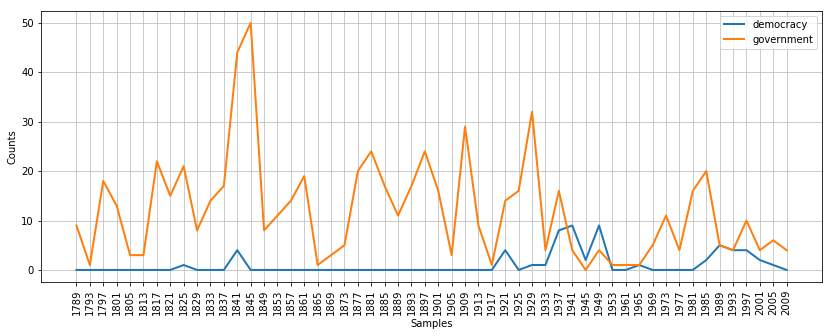

In [18]:
"""
Set up a Conditional word Frequency Distribution (CFD); 
pairing a list of words against the list of inaugural addresses.
"""

plt.rcParams['figure.figsize'] = (14,5)
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['government', 'democracy']
           if w.lower().startswith(target))
cfd.plot()

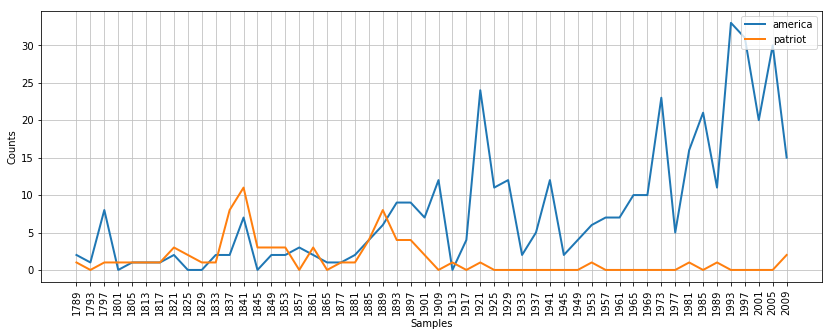

In [19]:
"""
FINDINGS:

    1. 'government' is a far more popular theme in the addresses that comprise the corpora.
    2. It remains a bit astonishing to see how little the word 'democracy' has been mentioned.
    
#####################################################################################################################

Set up a conditional word frequency distribution for it, 
pairing off a list of words with the list of inaugural addresses.


Set up a Conditional word Frequency Distribution (CFD) for it, 
pairing off a list of words with the list of inaugural addresses.
"""

plt.rcParams['figure.figsize'] = (14,5)
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'patriot']
           if w.lower().startswith(target))
cfd.plot()

In [ ]:
"""
FINDINGS:

    1. While the words 'America' and 'patriot' appear rather consistently across the entire Inaugural Address Corpus,
       there is a distinct discrepancy in the frequency of how often they appear.
    2. 'patriot' shows a clear trend in steadiness until it plateaus, starting at around 1909.
    3. 'America' is mentioned far more frequently, spiking dramatically in 1921 and again in the 1990s and 2000s.
    4. Despite the current trend (frequent mention of "patriot" among the US population), the word is not frequently 
       used in the addresses of the presidents who have given them; there does not appear to be any correlation between 
       the two; at least, not from a presidential/political perspective.
"""